In [1]:
# Problem statement---------


# <font color = 'green'>Importing basic libraries

In [2]:
# for data frame manipulation
import pandas as pd

# for basic numerical operation
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for missing values
import missingno as mno

#for setting background style
plt.style.use('fivethirtyeight')

# for warnings ignore
import warnings
warnings.filterwarnings('ignore')

# <font color = 'green'>Reading the Titanic dataset

In [3]:

df = pd.read_csv('C:/Users/rayah/OneDrive/Desktop/INSOFE_PY_ML/Titanic_dataset/train.csv')


In [4]:
# checking the dataframe type

type(df)


pandas.core.frame.DataFrame

In [5]:
# top 5 rows

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# bottom 5 rows

df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# shape of data frame

df.shape


(891, 12)

In [8]:
# columns of data frame

df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# dtypes of data frame

df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# info of data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# stats of numeric data

df.describe().style.background_gradient(cmap='magma')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# stats for category data

df.describe(include='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:

df.describe(include='object').corr()


""


<AxesSubplot:>

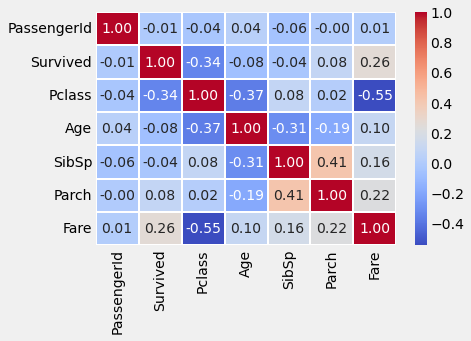

In [14]:
# checking the correlation of features

sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=2,cmap='coolwarm')


# <font color = 'green'>Exploratory Data Analysis

<AxesSubplot:>

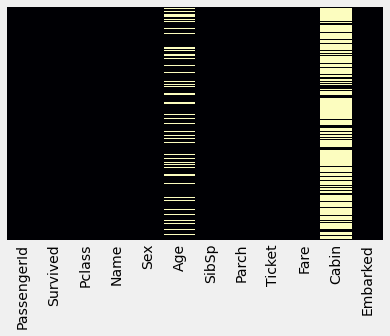

In [15]:
# visualize missing values using heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

# we can see the age, cabin and embarked columns has null values

In [16]:
# checking which column has missing values

#df1.isna().sum() # here we can see the null values in three columns 

In [17]:
#df1.isna().sum().sum()

In [18]:
# unique values of data

df.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

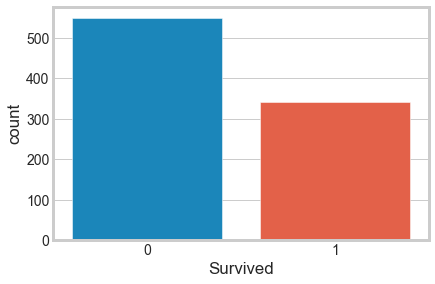

In [19]:
sns.set_style('whitegrid')
sns.countplot(x=df['Survived'],data=df)

#0-not survived and 1-survived
# the most of the people(male&female) are dead/lost their life 


<AxesSubplot:xlabel='Survived', ylabel='count'>

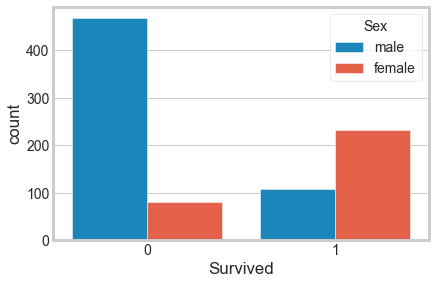

In [20]:
# lets check male/female survived more

sns.set_style('whitegrid')
sns.countplot(x=df['Survived'],hue=df['Sex'],data=df)

# male are high in not survived and female are high in survived


<AxesSubplot:xlabel='Survived', ylabel='count'>

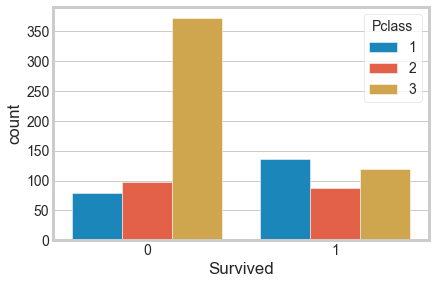

In [21]:
# checking which passeger class has survived more

sns.set_style('whitegrid')
sns.countplot(x=df['Survived'],hue=df['Pclass'],data=df)

# there are three classes class1(blue)-rich, class2(orange)-middle class and class3(yellow)-poor people
# the survival rate of class1(blue)-rich is more whwn compare to all classes


<AxesSubplot:xlabel='Age'>

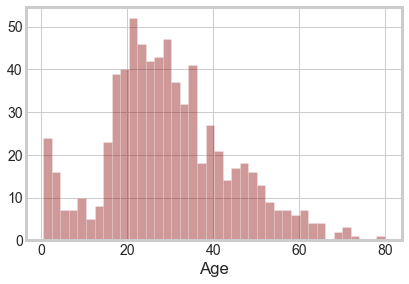

In [22]:
# checking the distribution of age column

sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

# most of the people is from 18-36 age group


<AxesSubplot:xlabel='SibSp', ylabel='count'>

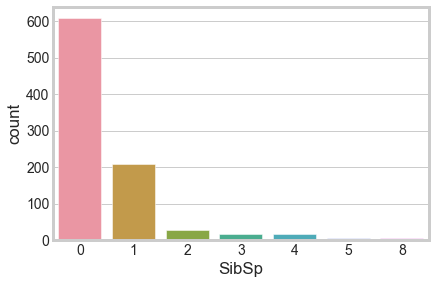

In [23]:
# countplot for siblingspouse

sns.countplot(x=df['SibSp'],data=df)

# only few members have sibling 


(array([385., 177., 139.,  31.,  41.,  26.,  31.,   8.,  11.,   4.,   7.,
          9.,   2.,   0.,   0.,   0.,   4.,   5.,   0.,   2.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <BarContainer object of 40 artists>)

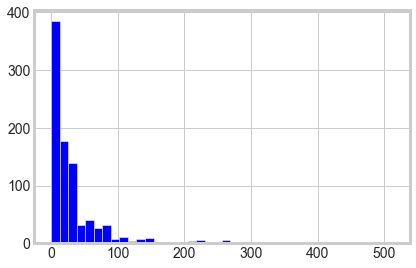

In [24]:
# hisplot for fare

plt.hist(df['Fare'],color='blue',bins=40)

# the frequent value of fare-8.05
#the median value of fare-14.4542, the mean value of fare-32.2042079685746 and max value of fare-512.3292


In [25]:

print(df['Fare'].mode())


0    8.05
dtype: float64


In [26]:

print(df['Fare'].median())


14.4542


In [27]:

print(df['Fare'].max())


512.3292


# <font color = 'green'>Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

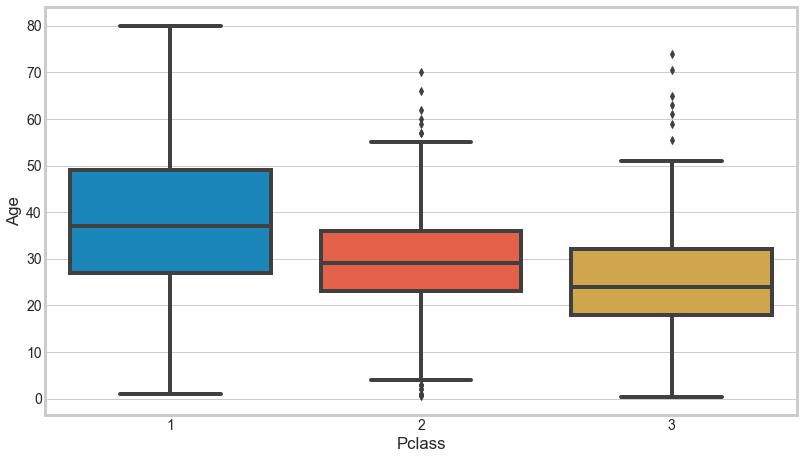

In [28]:

plt.figure(figsize=(12,7))
sns.boxplot(x = df['Pclass'],y = df['Age'], data=df)

# avg age(pclass1)=38, avg age(pclass2)=29 & avg age(pclass3)=24


In [29]:
# computing the Age column with the median value(50 percentile)

def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [30]:
# adding the impute_age using apply function to age column


df['Age']= df[['Age','Pclass']].apply(impute_age,axis=1)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# replacing Embarked column null values with most frequent values 

print(df['Embarked'].value_counts())

df['Embarked'].fillna('S',inplace=True)


S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [32]:
# null values checking

df['Embarked'].isna().sum()


0

In [33]:
# droping the Cabin column bcz morethan 70% of the data has null values

print(df['Cabin'].isnull().sum())

# drop the unwanted columns
df1 = df.drop(['PassengerId','Cabin'],axis=1)


687


In [34]:
# checking the columns are dropped or not

df1.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
# converting categorical to numerical

df1['Sex'] = pd.get_dummies(df1['Sex'],drop_first=True)


In [36]:
#using label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df1['Embarked']=le.fit_transform(df1['Embarked'])


In [37]:
#checking the data frame again

df1.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
